## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DAT/customer_churn_dataset-testing-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [8]:
# 각 변수의 요약 정보 생성
summary = pd.DataFrame({
    'Data Type': df.dtypes,                # 데이터 타입
    'Unique Values': df.nunique(),         # 고유값 개수
    'Missing Values': df.isnull().sum(),   # 결측치 개수
    'Example Value': df.iloc[0]            # 첫 번째 값 예시로 출력
})

# 요약 정보 출력
print(summary)

                  Data Type  Unique Values  Missing Values Example Value
CustomerID            int64          64374               0             1
Age                   int64             48               0            22
Gender               object              2               0        Female
Tenure                int64             60               0            25
Usage Frequency       int64             30               0            14
Support Calls         int64             11               0             4
Payment Delay         int64             31               0            27
Subscription Type    object              3               0         Basic
Contract Length      object              3               0       Monthly
Total Spend           int64            901               0           598
Last Interaction      int64             30               0             9
Churn                 int64              2               0             1


In [5]:
import pandas as pd

# One-hot Encoding 적용
df = pd.get_dummies(df, columns=['Gender', 'Subscription Type', 'Contract Length'])


In [20]:
df

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,25,14,4,27,598,9,1,1,0,1,0,0,0,1,0
1,2,41,28,28,7,13,584,20,0,1,0,0,0,1,0,1,0
2,3,47,27,10,2,29,757,21,0,0,1,0,1,0,1,0,0
3,4,35,9,12,5,17,232,18,0,0,1,0,1,0,0,0,1
4,5,53,58,24,9,2,533,18,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,33,12,6,21,947,14,1,1,0,1,0,0,0,0,1
64370,64371,37,6,1,5,22,923,9,1,0,1,0,0,1,1,0,0
64371,64372,25,39,14,8,30,327,20,1,0,1,0,1,0,0,1,0
64372,64373,50,18,19,7,22,540,13,1,1,0,0,0,1,0,1,0


In [6]:
df = df.astype(int)

In [19]:
# 각 변수의 요약 정보 생성
summary = pd.DataFrame({
    'Data Type': df.dtypes,                # 데이터 타입
    'Unique Values': df.nunique(),         # 고유값 개수
    'Missing Values': df.isnull().sum(),   # 결측치 개수
    'Example Value': df.iloc[0]            # 첫 번째 값 예시로 출력
})

# 요약 정보 출력
print(summary)

                           Data Type  Unique Values  Missing Values  \
CustomerID                     int64          64374               0   
Age                            int64             48               0   
Tenure                         int64             60               0   
Usage Frequency                int64             30               0   
Support Calls                  int64             11               0   
Payment Delay                  int64             31               0   
Total Spend                    int64            901               0   
Last Interaction               int64             30               0   
Churn                          int64              2               0   
Gender_Female                  int64              2               0   
Gender_Male                    int64              2               0   
Subscription Type_Basic        int64              2               0   
Subscription Type_Premium      int64              2               0   
Subscr

### 독립변수와 종속변수 간의 상관관계 히트맵

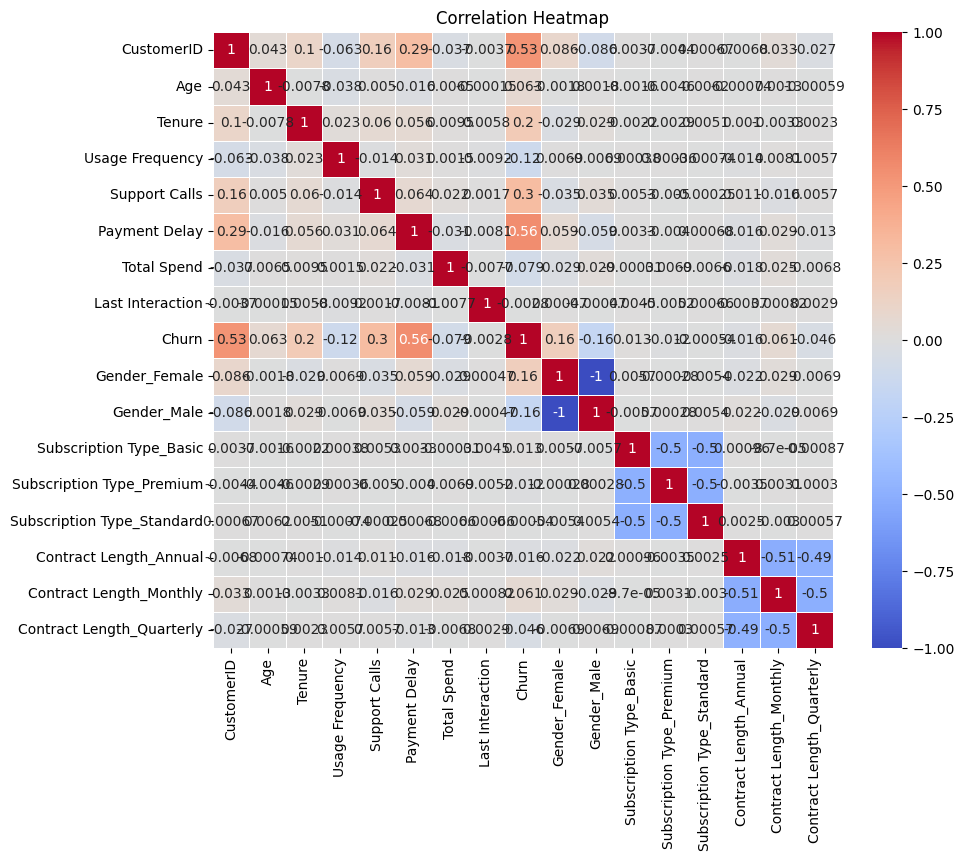

In [21]:
# 데이터의 상관관계 계산
correlation_matrix = df.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# 그래프 제목 및 레이블 설정
plt.title('Correlation Heatmap')
plt.show()

### 이탈 고객과 잔류 고객의 변수별 분포 시각화 비교
Age, Tenure, Usage Frequenct, Support Calls, Payment Delay, Total Spend

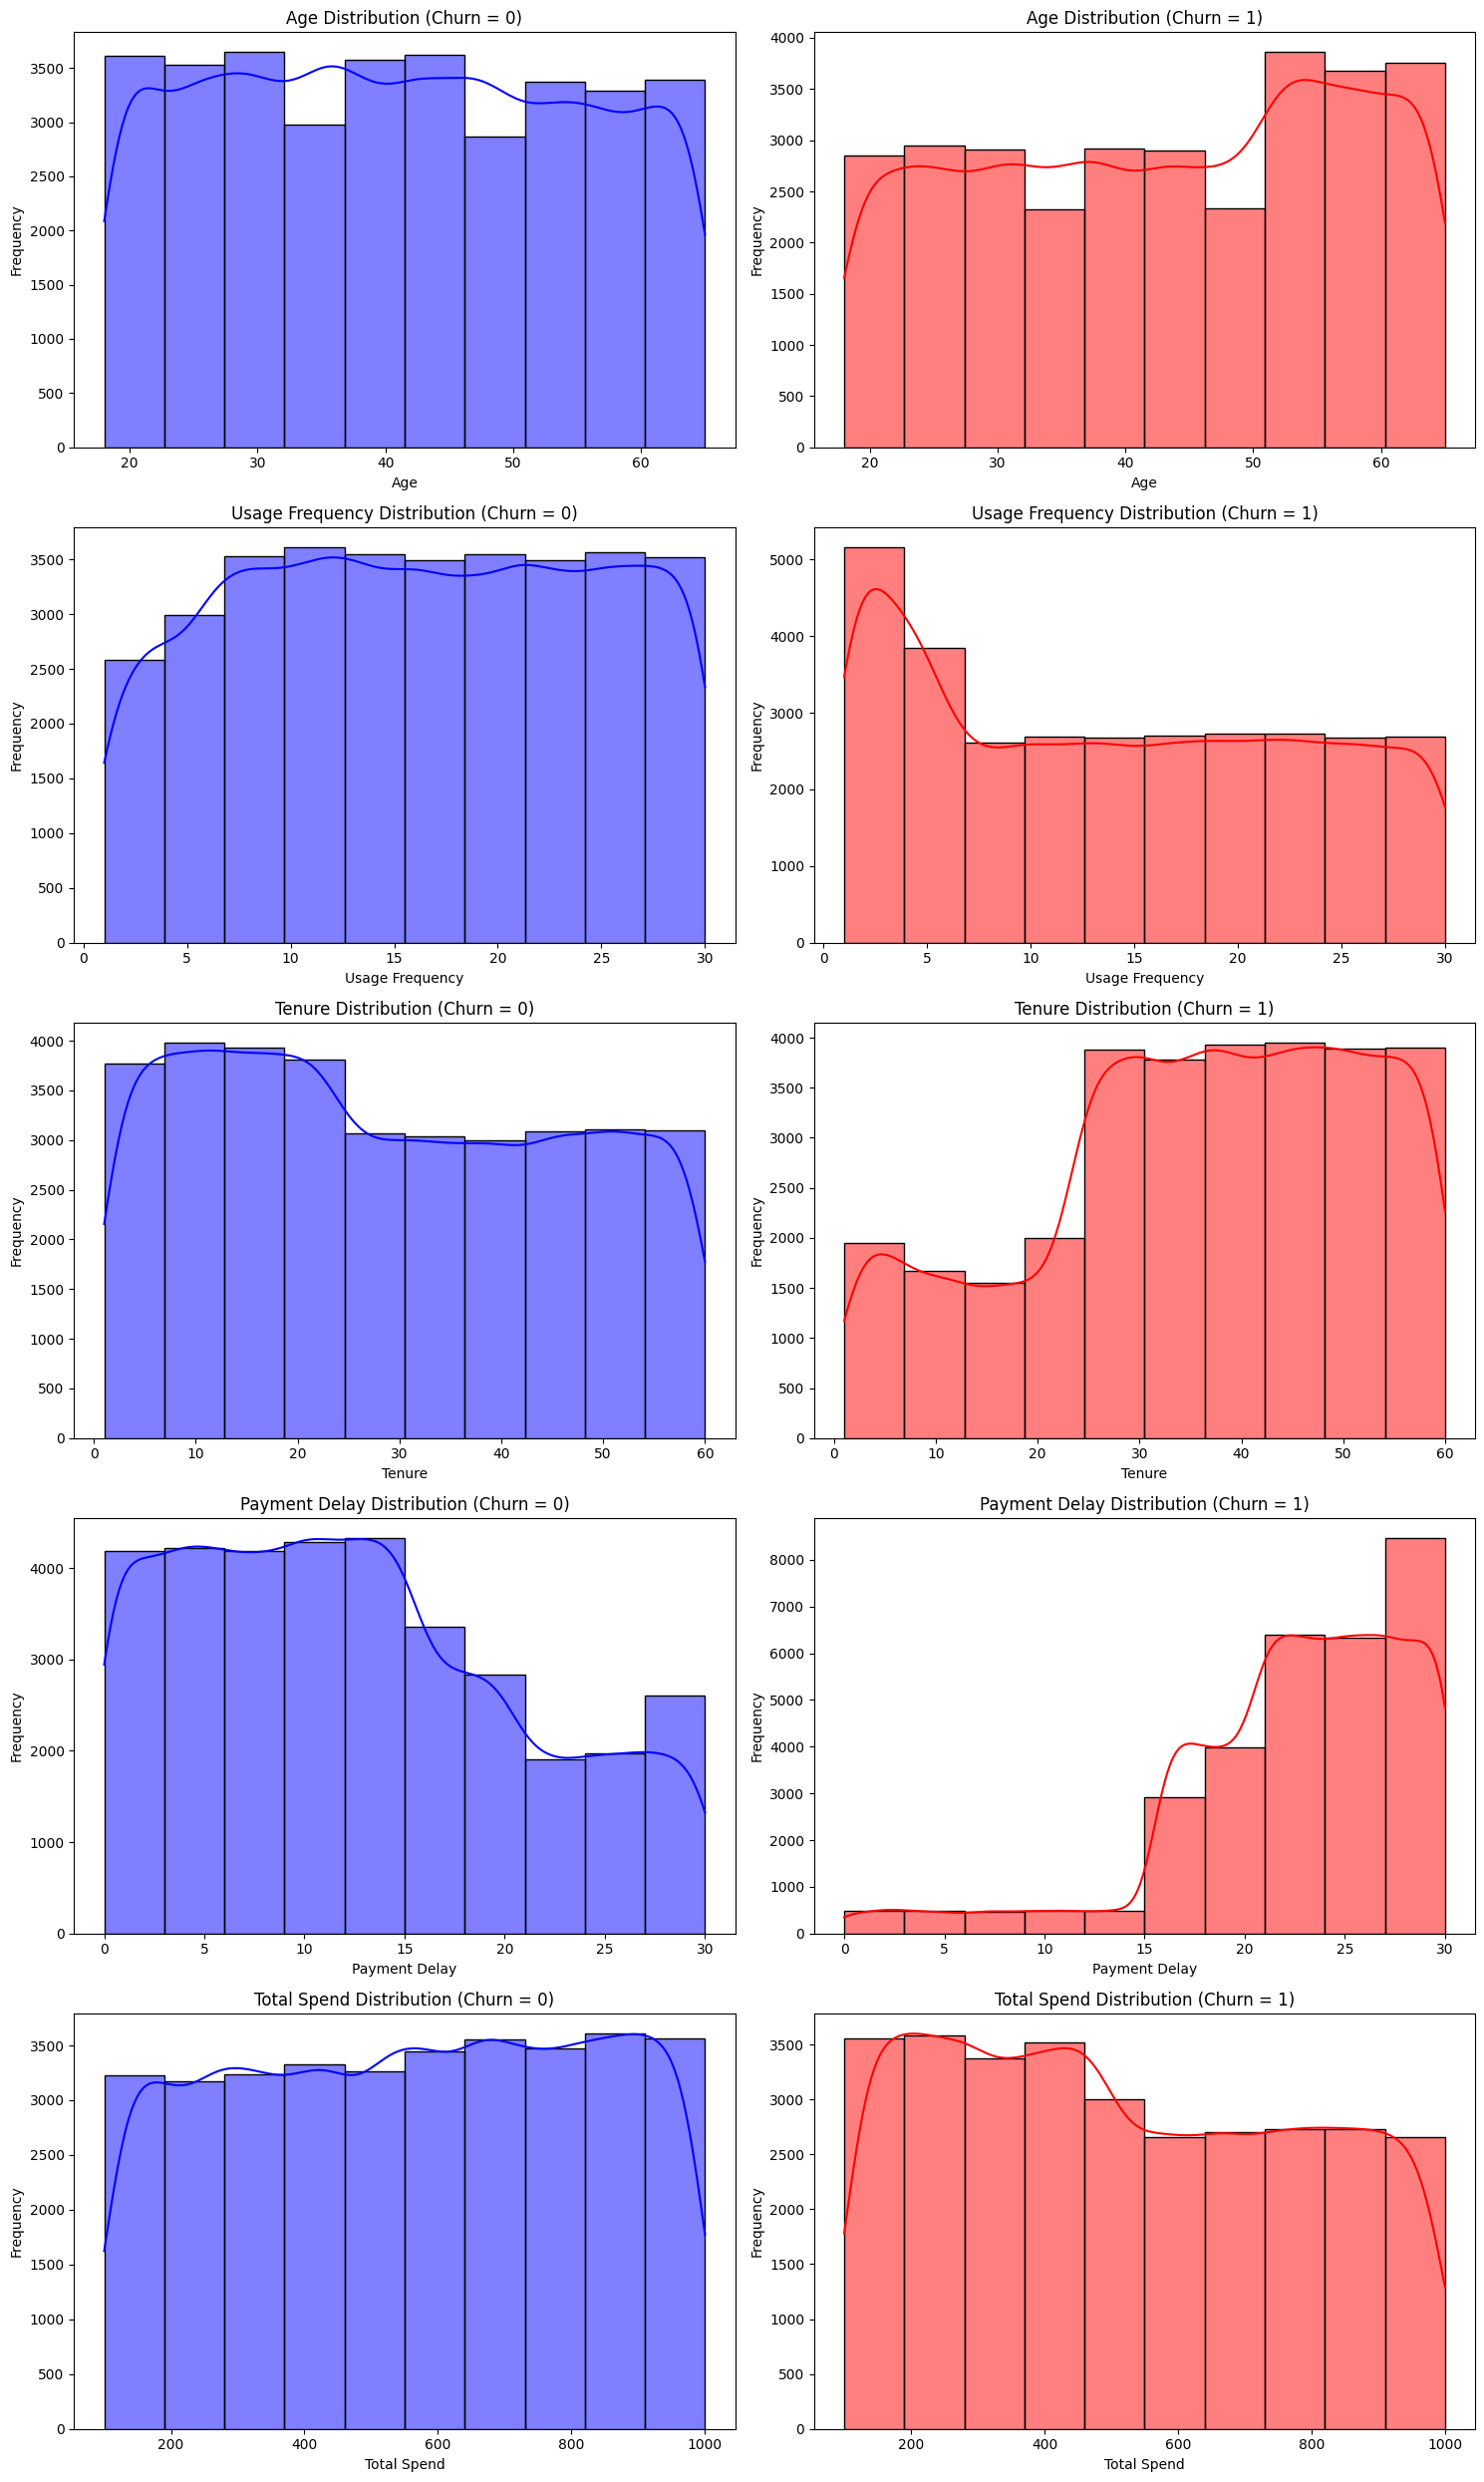

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data, features, churn_values, colors, titles, figsize=(15, 25)):
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features):
        for j, churn in enumerate(churn_values):
            plt.subplot(len(features), len(churn_values), i * len(churn_values) + j + 1)
            sns.histplot(data[data['Churn'] == churn][feature], kde=True, bins=10, color=colors[j])
            plt.title(titles[i][j])
            plt.xlabel(feature)
            plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 히스토그램 그리기
plot_histograms(
    df,
    features=['Age', 'Usage Frequency', 'Tenure', 'Payment Delay', 'Total Spend'],
    churn_values=[0, 1],
    colors=['blue', 'red'],
    titles=[
        ['Age Distribution (Churn = 0)', 'Age Distribution (Churn = 1)'],
        ['Usage Frequency Distribution (Churn = 0)', 'Usage Frequency Distribution (Churn = 1)'],
        ['Tenure Distribution (Churn = 0)', 'Tenure Distribution (Churn = 1)'],
        ['Payment Delay Distribution (Churn = 0)', 'Payment Delay Distribution (Churn = 1)'],
        ['Total Spend Distribution (Churn = 0)', 'Total Spend Distribution (Churn = 1)']
    ]
)

- Age : 이탈 고객 중 50~60대 고객의 분포가 더 높음
- Usage Frequency : 이탈 고객의 사용 빈도수가 적은 고객의 분포가 높음
- Payment Delay : 이탈 고객이 delay가 많게 나타남

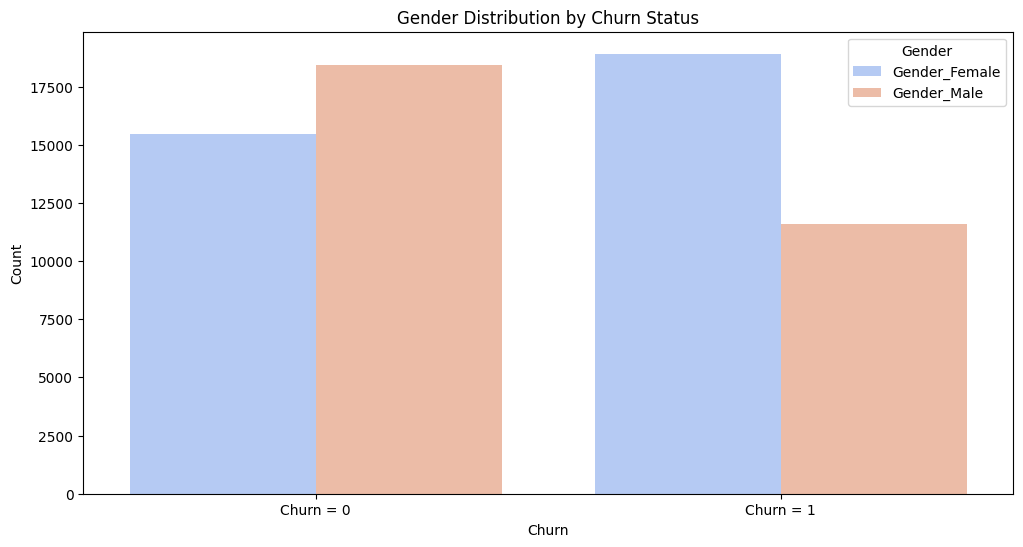

In [35]:
# Churn 값에 따른 Gender 빈도 데이터 생성
gender_counts = df.groupby(['Churn']).sum()[['Gender_Female', 'Gender_Male']].reset_index()

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# Churn이 0인 데이터와 1인 데이터의 Gender 빈도 시각화
sns.barplot(x='Churn', y='value', hue='variable', data=gender_counts.melt(id_vars='Churn'), palette='coolwarm')

plt.title('Gender Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(ticks=[0, 1], labels=['Churn = 0', 'Churn = 1'])

# 그래프 출력
plt.show()

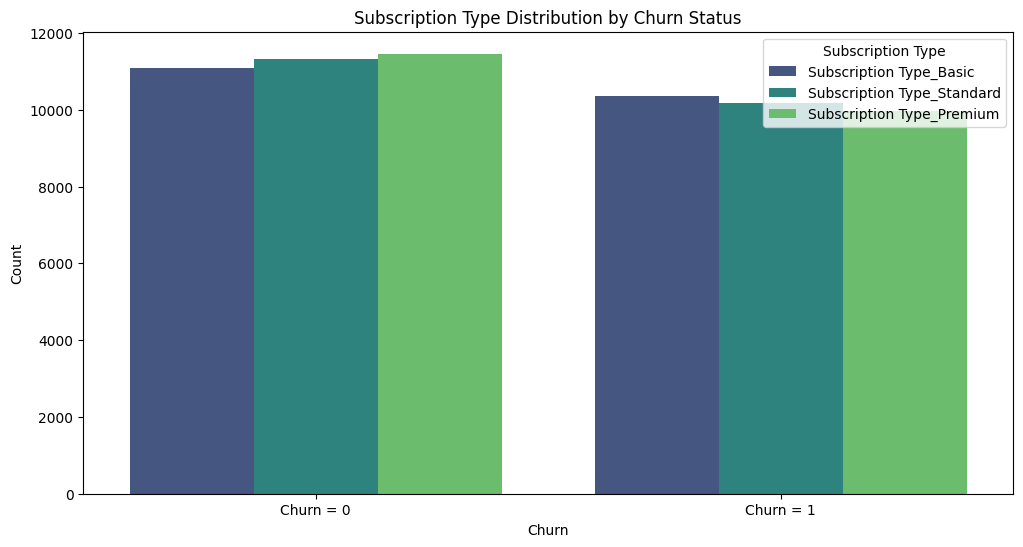

In [43]:
# Churn 값에 따른 Subscription Type 빈도 데이터 생성
subscription_counts = df.groupby(['Churn']).sum()[['Subscription Type_Basic', 'Subscription Type_Standard', 'Subscription Type_Premium']].reset_index()

# 데이터프레임을 긴 형식으로 변환
subscription_counts_long = subscription_counts.melt(id_vars='Churn', var_name='Subscription Type', value_name='Count')

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# Churn 값에 따른 Subscription Type 빈도 시각화
sns.barplot(x='Churn', y='Count', hue='Subscription Type', data=subscription_counts_long, palette='viridis')

plt.title('Subscription Type Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Subscription Type')
plt.xticks(ticks=[0, 1], labels=['Churn = 0', 'Churn = 1'])

# 그래프 출력
plt.show()

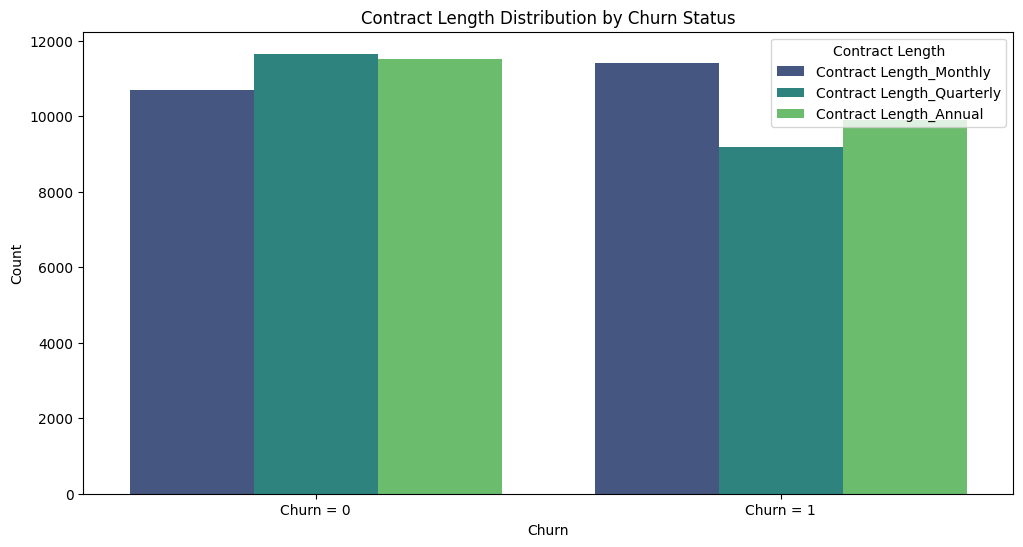

In [44]:
# Churn 값에 따른 Contract Length 빈도 데이터 생성
contract_length = df.groupby(['Churn']).sum()[['Contract Length_Monthly', 'Contract Length_Quarterly', 'Contract Length_Annual']].reset_index()

# 데이터프레임을 긴 형식으로 변환
contract_length_long = contract_length.melt(id_vars='Churn', var_name='Contract Length', value_name='Count')

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# Churn 값에 따른 Contract Length 빈도 시각화
sns.barplot(x='Churn', y='Count', hue='Contract Length', data=contract_length_long, palette='viridis')

plt.title('Contract Length Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Contract Length')
plt.xticks(ticks=[0, 1], labels=['Churn = 0', 'Churn = 1'])

# 그래프 출력
plt.show()

In [7]:
cols = list(df.columns)

In [8]:
df = df[cols[:8]+cols[9:]+[cols[8]]]
df

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,1,22,25,14,4,27,598,9,1,0,1,0,0,0,1,0,1
1,2,41,28,28,7,13,584,20,1,0,0,0,1,0,1,0,0
2,3,47,27,10,2,29,757,21,0,1,0,1,0,1,0,0,0
3,4,35,9,12,5,17,232,18,0,1,0,1,0,0,0,1,0
4,5,53,58,24,9,2,533,18,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,33,12,6,21,947,14,1,0,1,0,0,0,0,1,1
64370,64371,37,6,1,5,22,923,9,0,1,0,0,1,1,0,0,1
64371,64372,25,39,14,8,30,327,20,0,1,0,1,0,0,1,0,1
64372,64373,50,18,19,7,22,540,13,1,0,0,0,1,0,1,0,1


### 분석 및 예측

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 1, 1, 0])

In [12]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7930409568684306